In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
AAPL = pd.read_csv('AAPL.csv')
AAPL.set_index("Date",inplace=True)
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,3.081786,3.092143,2.925000,2.992857,2.551165,1238319600
2007-01-04,3.001786,3.069643,2.993571,3.059286,2.607790,847260400
2007-01-05,3.063214,3.078571,3.014286,3.037500,2.589219,834741600
2007-01-08,3.070000,3.090357,3.045714,3.052500,2.602006,797106800
2007-01-09,3.087500,3.320714,3.041071,3.306071,2.818154,3349298400


In [3]:
columns_to_drop = ['Open', 'High', 'Low','Adj Close', 'Volume']
AAPL = AAPL.drop(columns_to_drop, axis='columns')

In [4]:
AAPL = AAPL.loc['2011-08-01' : '2011-10-31']
AAPL.head()

,Close
Date,
2011-08-01,14.169643
2011-08-02,13.889643
2011-08-03,14.020357
2011-08-04,13.477500
2011-08-05,13.343571


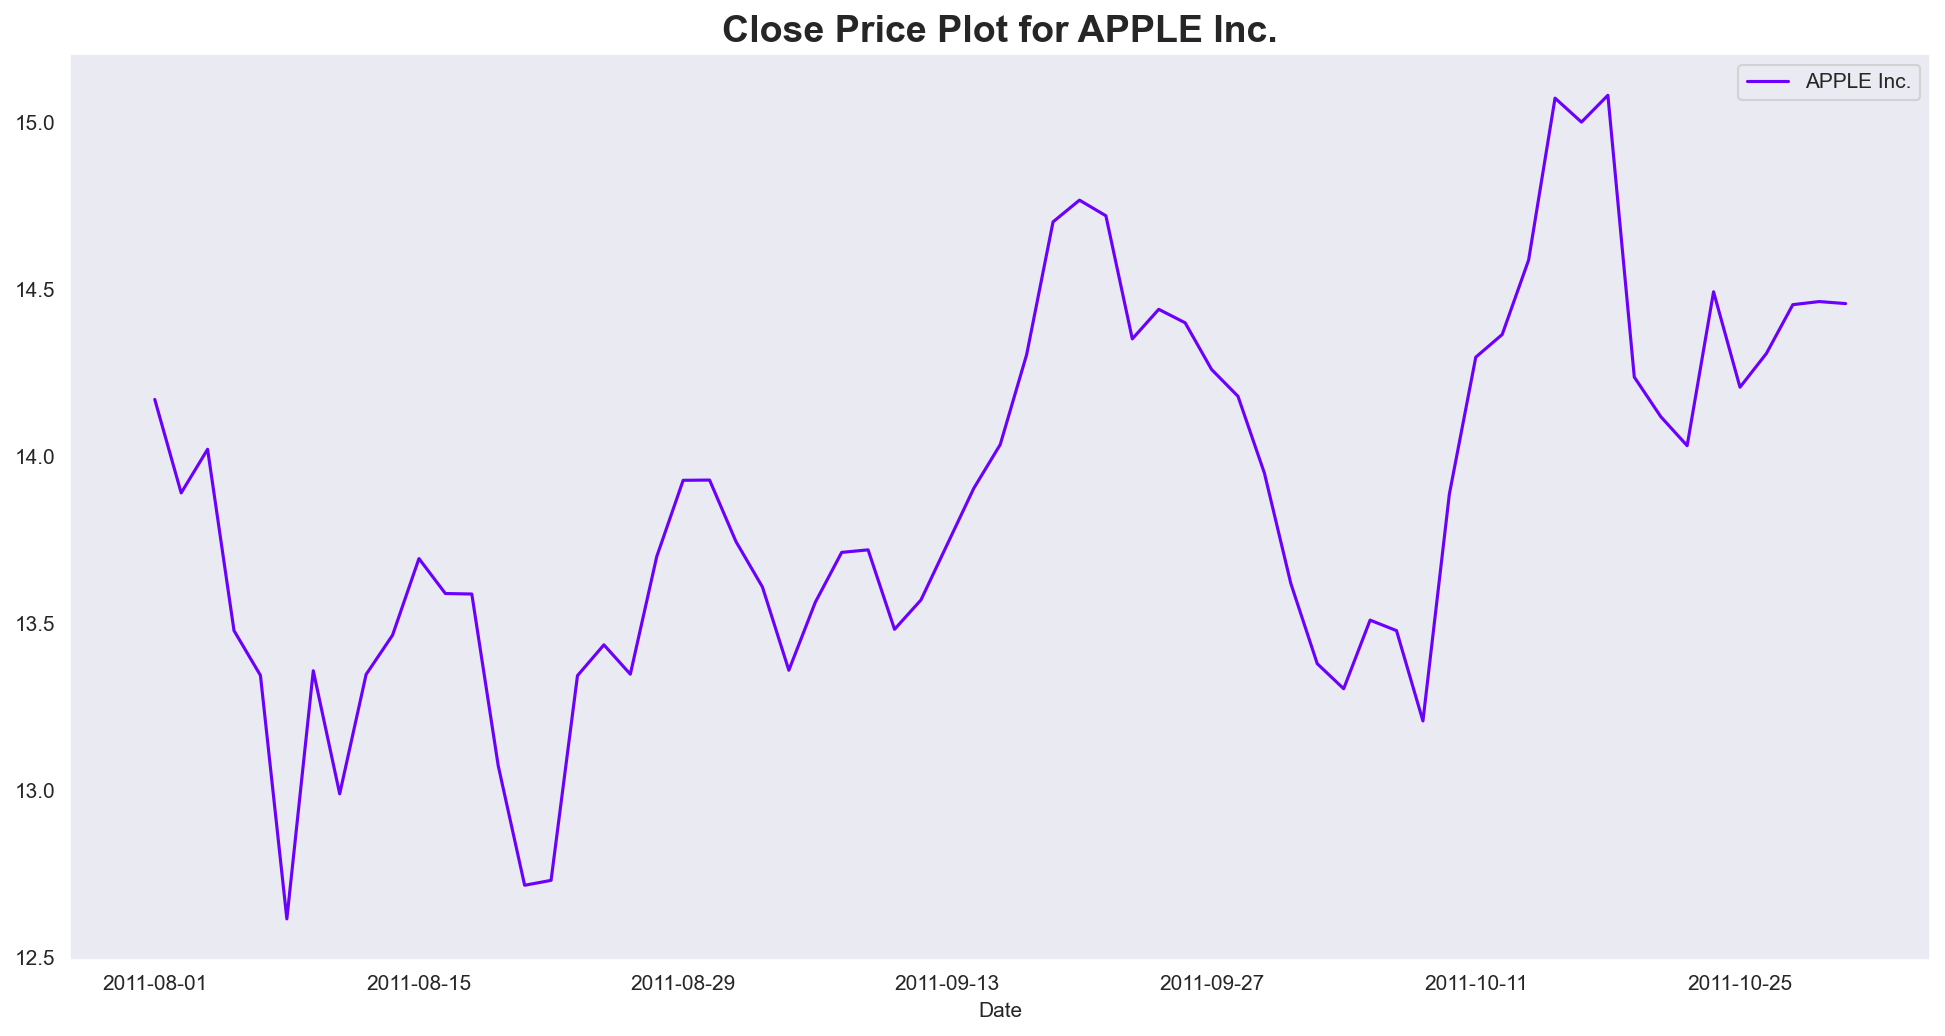

In [5]:
plt.figure(figsize = (16, 8), dpi=150)
AAPL['Close'].plot(label = 'APPLE Inc.', color = '#6C00FF', grid = False) # Plot the closing price 
# adding title to the plot
plt.title('Close Price Plot for APPLE Inc.', fontweight = 'bold', fontsize=18)
# adding legend to the curve
plt.legend()

Import the dataset having polarity and sentiment compound

In [6]:
sentiment_df = pd.read_csv('Sentiment_Analysis_tweets.csv')
sentiment_df.set_index("Date",inplace=True)
sentiment_df.head()

,polarity,compound
Date,,
2011-08-01,0.401031,0.209485
2011-08-02,0.322874,0.155599
2011-08-03,0.474322,0.253885
2011-08-04,0.402786,0.201106
2011-08-05,0.593881,0.322579


In [7]:
data = pd.merge(sentiment_df,  AAPL, left_index=True, right_index=True)
data.head()

,polarity,compound,Close
Date,,,
2011-08-01,0.401031,0.209485,14.169643
2011-08-02,0.322874,0.155599,13.889643
2011-08-03,0.474322,0.253885,14.020357
2011-08-04,0.402786,0.201106,13.477500
2011-08-05,0.593881,0.322579,13.343571


In [8]:
max = data['Close'].max()
min = data['Close'].min()
data['Close_Rescaled'] = (data['Close']-min)/(max-min)

**Scatter Plot between Sentiment and Apple Close Price Rescaled**

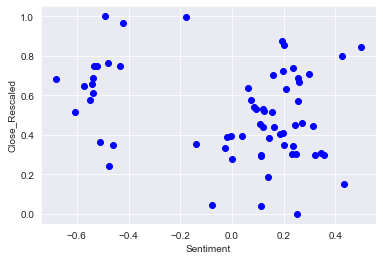

In [9]:
plt.plot(data['compound'],data['Close_Rescaled'], 'o',c='blue')
plt.ylabel( 'Close_Rescaled' )
plt.xlabel( 'Sentiment' )
plt.show()

**Linear Regression Analysis between Apple Close_Rescaled Price and Compound Sentiment Indicator**

In [10]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Close_Rescaled~ compound", data=data).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Close_Rescaled   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     5.037
Date:                Wed, 25 Jan 2023   Prob (F-statistic):             0.0283
Time:                        16:20:10   Log-Likelihood:                 6.3958
No. Observations:                  65   AIC:                            -8.792
Df Residuals:                      63   BIC:                            -4.443
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5106      0.028     18.481      0.0

**Scatter Plot between Polarity and Apple Close Price Rescaled**

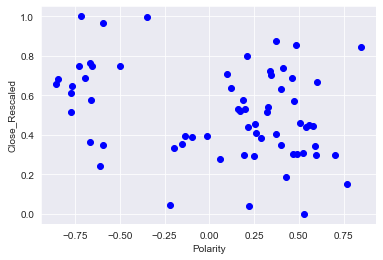

In [11]:
plt.plot(data['polarity'],data['Close_Rescaled'], 'o',c='blue')
plt.ylabel( 'Close_Rescaled' )
plt.xlabel( 'Polarity' )
plt.show()

**Linear Regression Analysis between Apple Close_Rescaled Price and Polarity**

In [12]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Close_Rescaled~ polarity", data=data).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Close_Rescaled   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     6.312
Date:                Wed, 25 Jan 2023   Prob (F-statistic):             0.0146
Time:                        16:20:10   Log-Likelihood:                 6.9993
No. Observations:                  65   AIC:                            -9.999
Df Residuals:                      63   BIC:                            -5.650
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5194      0.028     18.822      0.0

**Scatter Plot between Polarity and Apple Close Price**

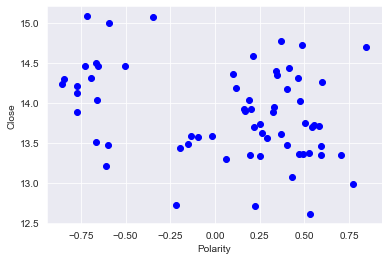

In [13]:
plt.plot(data['polarity'],data['Close'], 'o',c='blue')
plt.ylabel( 'Close' )
plt.xlabel( 'Polarity' )
plt.show()

**Linear Regression Analysis between Apple Close Price and Polarity**

In [14]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Close~ polarity", data=data).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     6.312
Date:                Wed, 25 Jan 2023   Prob (F-statistic):             0.0146
Time:                        16:20:10   Log-Likelihood:                -51.653
No. Observations:                  65   AIC:                             107.3
Df Residuals:                      63   BIC:                             111.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8952      0.068    204.235      0.0

**Scatter Plot between Sentiment Compound Indicator and Apple Close Price**

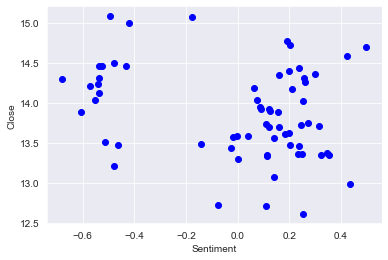

In [15]:
plt.plot(data['compound'],data['Close'], 'o',c='blue')
plt.ylabel( 'Close' )
plt.xlabel( 'Sentiment' )
plt.show()

**Linear Regression Analysis between Apple Close Price and Compound Sentiment Indicator**

In [16]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Close~ compound", data=data).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     5.037
Date:                Wed, 25 Jan 2023   Prob (F-statistic):             0.0283
Time:                        16:20:11   Log-Likelihood:                -52.256
No. Observations:                  65   AIC:                             108.5
Df Residuals:                      63   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8734      0.068    203.678      0.0

#### REPLICATE ANALYSIS FOR LOGRETURNS

In [17]:
returns = pd.read_csv('prices.csv')
returns.set_index("Date",inplace=True)

returns = returns['log_return']
returns.head()

Date
2011-08-01         NaN
2011-08-02   -0.019958
2011-08-03    0.009367
2011-08-04   -0.039489
2011-08-05   -0.009987
Name: log_return, dtype: float64

In [18]:
data = pd.merge(data,  returns, left_index=True, right_index=True)
data.head()

,polarity,compound,Close,Close_Rescaled,log_return
Date,,,,,
2011-08-01,0.401031,0.209485,14.169643,0.630740,NaN
2011-08-02,0.322874,0.155599,13.889643,0.517166,-0.019958
2011-08-03,0.474322,0.253885,14.020357,0.570187,0.009367
2011-08-04,0.402786,0.201106,13.477500,0.349993,-0.039489
2011-08-05,0.593881,0.322579,13.343571,0.295668,-0.009987


**Scatter Plot between Compound Sentiment Indicator and LogReturn**

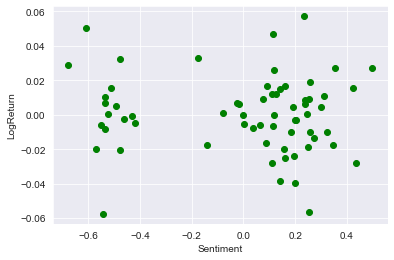

In [19]:
plt.plot(data['compound'],data['log_return'], 'o',c='green')
plt.ylabel( 'LogReturn' )
plt.xlabel( 'Sentiment' )
plt.show()

**Linear Regression Analysis between Log Return and Compound Sentiment Indicator**

In [20]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "log_return~ compound", data=data).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.2383
Date:                Wed, 25 Jan 2023   Prob (F-statistic):              0.627
Time:                        16:20:11   Log-Likelihood:                 153.28
No. Observations:                  64   AIC:                            -302.6
Df Residuals:                      62   BIC:                            -298.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.003      0.107      0.9

**Scatter Plot between Polarity and LogReturn**

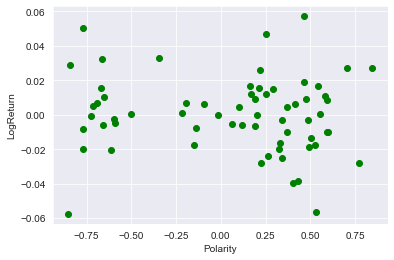

In [21]:
plt.plot(data['polarity'],data['log_return'], 'o',c='green')
plt.ylabel( 'LogReturn' )
plt.xlabel( 'Polarity' )
plt.show()

**Linear Regression Analysis between LogReturn and Polarity**

In [22]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "log_return~ polarity", data=data).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3132
Date:                Wed, 25 Jan 2023   Prob (F-statistic):              0.578
Time:                        16:20:11   Log-Likelihood:                 153.31
No. Observations:                  64   AIC:                            -302.6
Df Residuals:                      62   BIC:                            -298.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.003      0.176      0.8